# **Hunting for exoplanets using Machine Learning**
*  **[Use machine learning to hunt for exoplanets](https://www.youtube.com/watch?v=y1k2jc3YTeg&list=PL7HQvd_RTCc3Vope7dkx4pggrH5f-uvZe)**.

* Method used for hunting exoplanets: **[Transit Photometry](https://www.planetary.org/articles/down-in-front-the-transit-photometry-method)**

* Dataset used: **[Kepler Space Telescope Dataset](https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data)**

In [1]:
# Import required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Analysing the dataset ##

In [2]:
# Read training dataset (CSV file) into a dataframe

train_df = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
# Shape of the training dataframe

train_df.shape

(5087, 3198)

## Check for missing values ##

In [4]:
# Display the rows with null values in the dataframe

train_df[train_df.isnull().any(axis = 1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

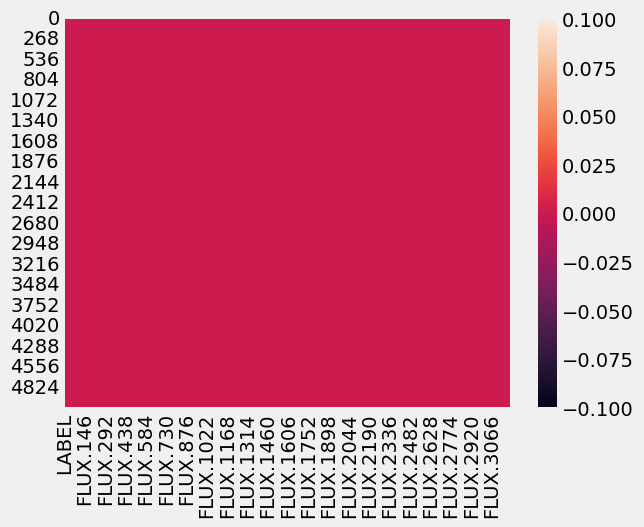

In [5]:
# We can visualize null values using a heatmap as well
# Display null values in training dataframe
# In this case, it'll return a blank plot as there are no missing values

sns.heatmap(train_df.isnull())

## Decoding the labels in the dataset ##

In [6]:
# Check the number of labels in the train dataframe

train_df['LABEL'].unique()

array([2, 1])

In [7]:
# Extract indexes of stars with exoplanets

train_df[train_df['LABEL'] == 2].index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36],
      dtype='int64')

* Rows 0 to 36 only are have label 2. This indicates only 37 stars have exoplanets in the train data.
* The distribution of labels can also be visualized using countplot.

[Text(0, 0, '5050'), Text(0, 0, '37')]

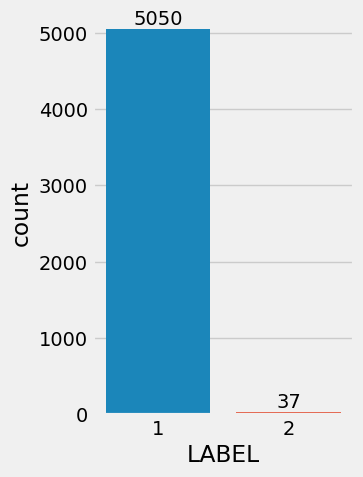

In [8]:
# Visualize distribution of both labels using countplot

plt.figure(figsize = (3, 5))
ax = sns.countplot(x = 'LABEL', data = train_df)
ax.bar_label(ax.containers[0])

* The train data is highly imbalanced as of now. We will work on both balanced and imbalanced data and compare the results.

## Replacing the labels ##
Replace the labels for ease of working:

Stars with exoplanets: 2 -> 1
Stars without exoplanets: 1 -> 0

In [9]:
#Replacing the labels 2 and 1 with 1 and 0 respectively

train_df = train_df.replace({"LABEL" : {2 : 1, 1: 0}})
train_df.LABEL.unique()

array([1, 0])

## Visualizing the light curves in the data ##

When an exoplanet passes between the telescope and the star, the flux value of the star decreases, which causes a dip in the light curve of the star. In other words, when we plot the graph of the flux values of a particular star, and if the light curve follows a particular pattern where the flux initially decreases, remains constant and then increases over time, this can hint at the star being a candidate with an exoplanet. 

In [10]:
# Drop the label column as we do not want to plot it in the curve

plot_df = train_df.drop(['LABEL'], axis = 1)
plot_df

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


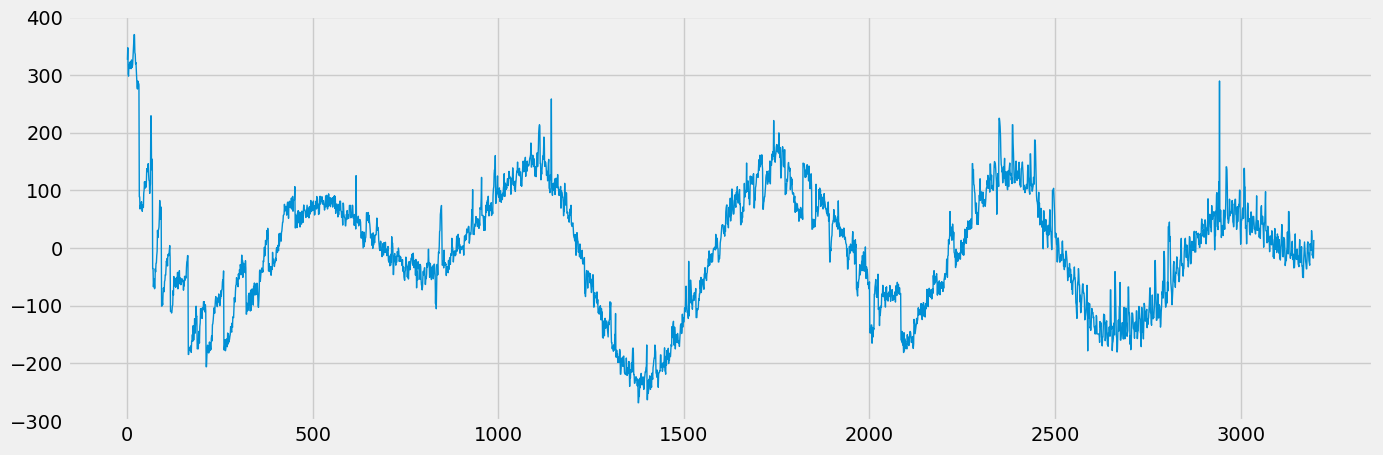

In [38]:
# Plot the light curve for a random star - here we plot for the 3rd star from the plot dataframe

time = range(1, 3198) # X - axis will hold the time periods staring from 1 to 3197
flux_values = plot_df.iloc[3, :].values # Y - axis will hold the range of flux or brightness values for the star
plt.figure(figsize = (15, 5))
plt.plot(time, flux_values, linewidth = 1)

We can try to plot for multiple stars. We can observe that if a plot has multiple dips, then this could possibly be a multiplanetary system where the star is being orbited by more than one exoplanet. If the plot has no dips and almost follows a straight line, this could mean the star has no exoplanet(s) orbiting it.

Here, for few stars (like star 2998), we can observe that some flux values are extremely high that lie out of range. These high flux values act as extreme outliers that can be problematic for the machine learning model we use further to classify the stars.

## Handling outliers ##
We first visualize the outliers using boxplot

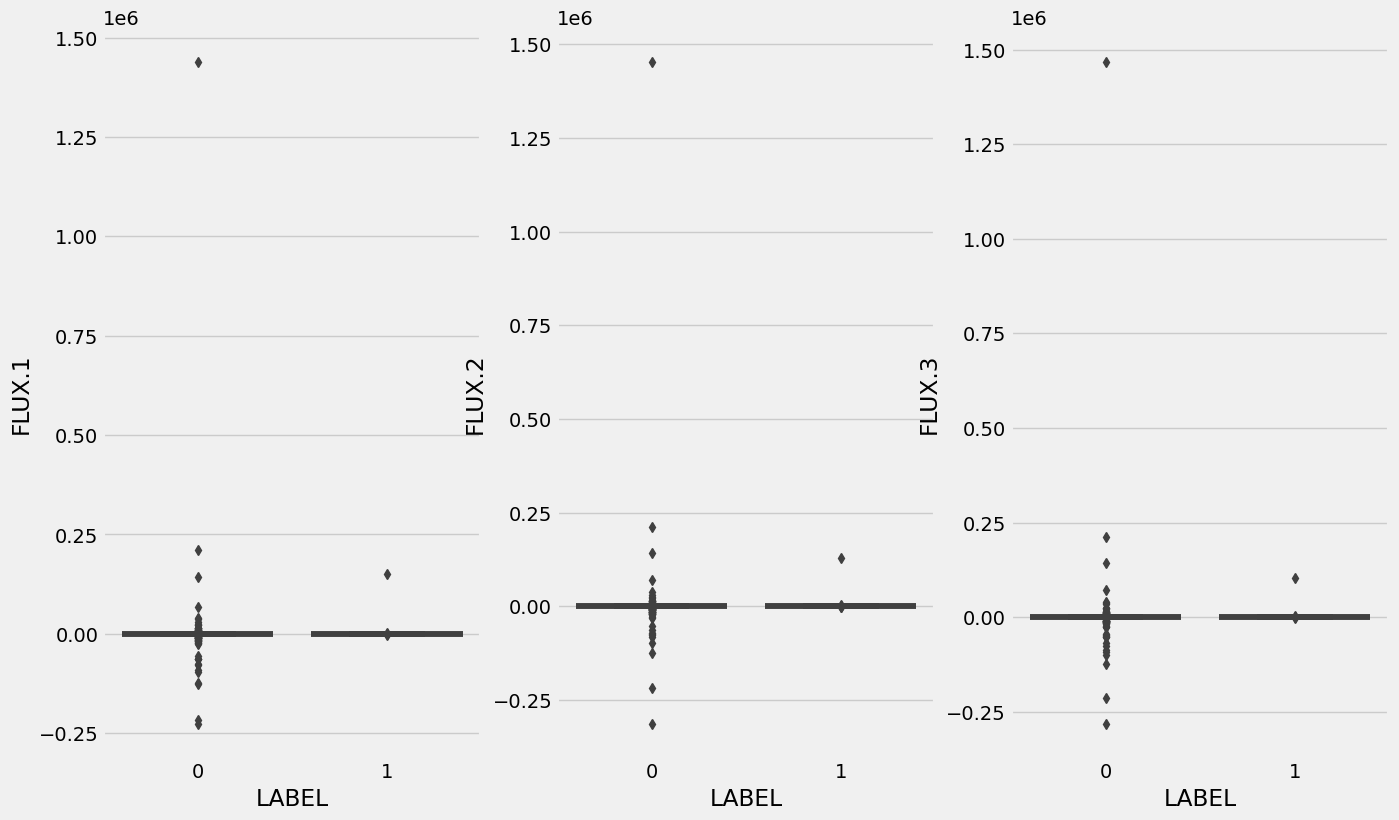

In [12]:
plt.figure(figsize = (20, 9))
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data = train_df, x = 'LABEL', y = 'FLUX.' + str(i))

By observing the dataset, we can infer that any flux values above 0.25 x 10⁶ are extreme outliers. We just drop these outliers.

<Axes: xlabel='LABEL', ylabel='FLUX.798'>

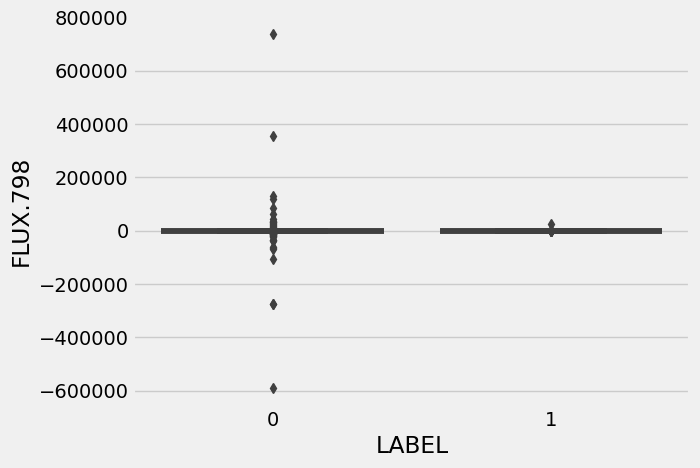

In [13]:
# Dropping outliers

train_df.drop(train_df[train_df['FLUX.2'] > 0.25e6].index, axis = 0, inplace = True)
sns.boxplot(data = train_df, x = 'LABEL', y = 'FLUX.' + str(np.random.randint(1000)))


## The K - Nearest Neighbours Algorithm ##
* Here, we use the KNN algorithm for classifying the data.
* Although, KNN is sensitive to outliers and imbalanced data, its performance is shown to be better than other classification algorithms for this dataset.
* Below are the steps to classify a new data point for a pre - determined value of K
  1. Determine the value of K.
  2. Use Euclidean distance to compute the distance between the new data point and all the other existing data points.
  3. Choose the K data points that are nearest to the new data point.
  4. Among these K points, pick the class that the majority of points are classified into.
  5. Assign this class to the new data point.

## Implementing KNN ##
We first implement KNN on imbalanced data.

In [14]:
# We first extract the independent (x) and dependent (y) features from train dataframe
# Here, our independent features are the flux values and the dependent feature is the label

x = train_df.drop(['LABEL'], axis = 1)
y = train_df.LABEL
x, y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [15]:
# Split dependent and independent features into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Feature Scaling ##
The flux values do not lie in a particular range in this dataset. They are varying between different values for each star. So we use feature scaling to scale the flux values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## Data Modelling ##

Validation accuracy of KNN:  0.990170380078637

Classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.25      0.08      0.12        13

    accuracy                           0.99      1526
   macro avg       0.62      0.54      0.56      1526
weighted avg       0.99      0.99      0.99      1526



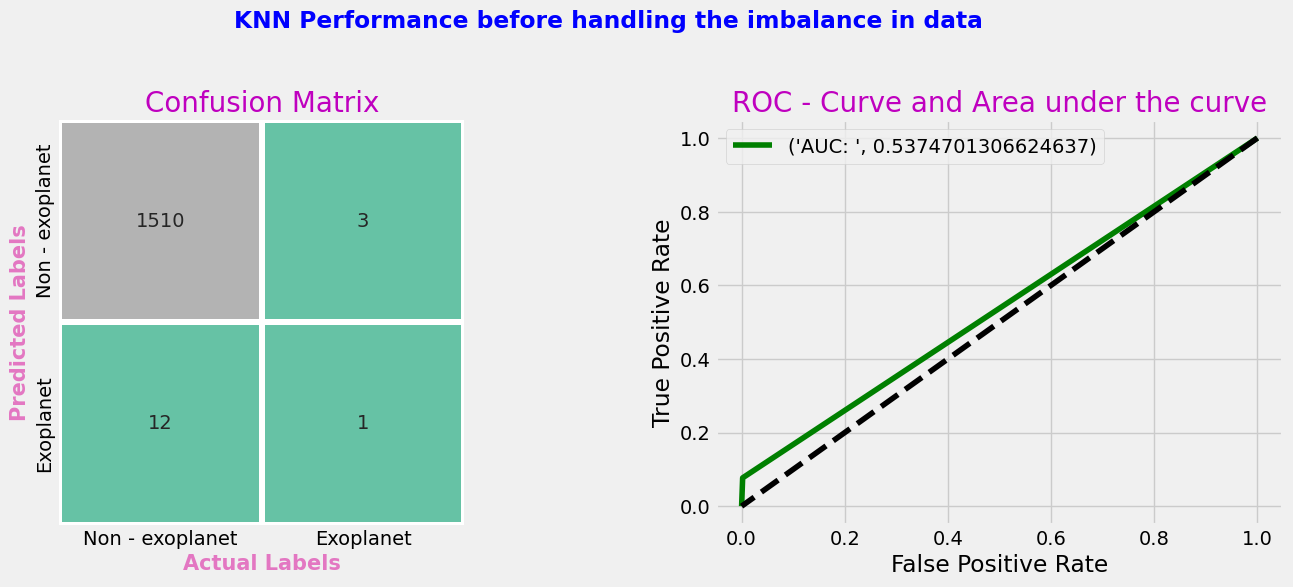

In [17]:
# Fit the KNN classifier model on the scaled train data
from sklearn.neighbors import KNeighborsClassifier as KNC

# Choosing k = 5
knn_classifier = KNC(n_neighbors = 1, metric = 'minkowski', p = 2)

# Fitting the model
knn_classifier.fit(x_train_sc, y_train)

# Predict the labels for the scaled test set
y_pred = knn_classifier.predict(x_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print("Validation accuracy of KNN: ", accuracy_score(y_test, y_pred))
print()
print("Classification report: \n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "Set2", fmt = "d", linewidths = 3, cbar = False, xticklabels = ['Non - exoplanet', 'Exoplanet'], yticklabels = ['Non - exoplanet', 'Exoplanet'], square = True)
plt.xlabel("Actual Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicted Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("Confusion Matrix", fontsize = 20, color = 'm')

# ROC Curve and Area under the curve
predicting_probabilities = knn_classifier.predict_proba(x_test_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC: ", auc(fpr, tpr)), color = 'g')
plt.plot([1,0], [1,0], "k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Curve and Area under the curve", fontsize = 20, color = 'm')
plt.show()




The classification report shows that the metrics precision, recall and F1 - score are all 0 for label 1, i.e., for stars with exoplanets. This is due to the high imbalance in data, as stars without exoplanets are way higher than stars with exoplanets. This imbalance has caused the KNN model to bias and predict towards stars without exoplanets. To handle this, we first balance the data and fit the model over the balanced data.

## Handling the imbalance in the data ##
We use RandomOverSampler for handling the imbalance in data. RandomOverSampler over - samples by duplicating some of the original samples from the minority class.

In my case, there was incompatibility with sklearn and imblearn versions. Hence, in the next two cells, I'm clearing the cache and installing the compatible versions. You would need to restart the kernel after installing the new versions.

In [18]:
# Clear Python cache
import sys
if 'imblearn' in sys.modules:
    del sys.modules['imblearn']
if 'sklearn' in sys.modules:
    del sys.modules['sklearn']

# Force reimport
import importlib
importlib.invalidate_caches()


In [19]:
!pip install --no-deps scikit-learn==1.4.0 --force-reinstall --quiet
!pip install --no-deps imbalanced-learn==0.12.0 --force-reinstall --quiet

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

<Axes: title={'center': 'After applying RandomOverSampler'}, xlabel='LABEL'>

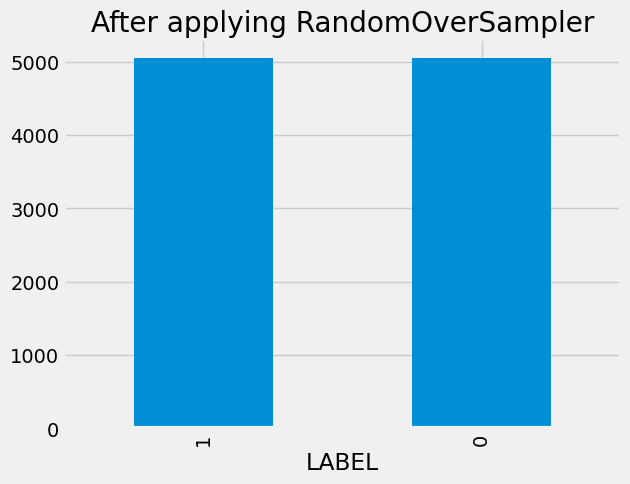

In [21]:
y_ros.value_counts().plot(kind = 'bar', title = 'After applying RandomOverSampler')


Let's compare and visualize imbalanced and balanced data

In [22]:
from collections import Counter
print(f"Before ROS: {Counter(y)}\nAfter ROS: {Counter(y_ros)}")

Before ROS: Counter({0: 5049, 1: 37})
After ROS: Counter({1: 5049, 0: 5049})


Initially, the count of class 0 was 5050. One entry is missing as it was an outlier and it was dropped.
After applying ROS, both classes 0 and 1 have 5049 entries. In order to balance the data, to the initial 37 class 1 entries, 5012 additional (duplicate) entries were added. This also increased the size of the dataset.

In [23]:
# Initial size of imbalanced dataset
print(len(y))

# Size of dataset after balancing
print(len(y_ros))

5086
10098


## Splitting balanced data into train and test set, scaling the data and data modelling ##

In [24]:
# Split dependent and independent features into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## Choosing optimal K value ##

Text(0.5, 0, 'K values')

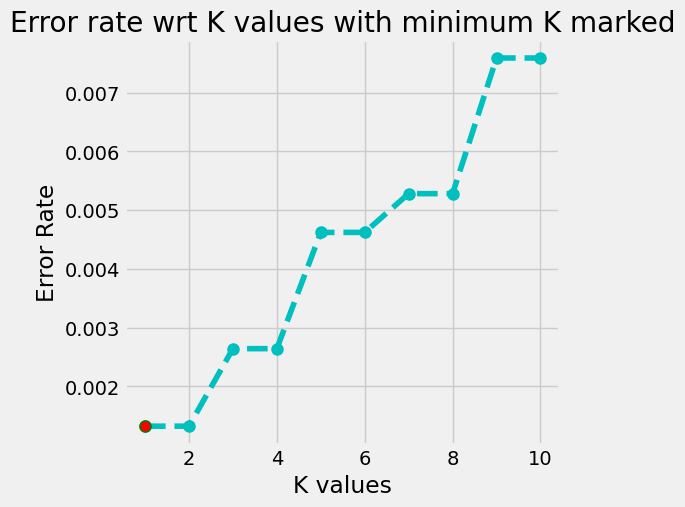

In [26]:
err_rate = []

for k in range(1,11):
    knn_clasfr = KNC(n_neighbors = k)
    knn_clasfr.fit(x_train_sc, y_train)
    pred = knn_clasfr.predict(x_test_sc)
    err_rate.append(np.mean(pred != y_test))

arg, val = err_rate.index(min(err_rate)), min(err_rate)

plt.figure(figsize = (5,5))
plt.plot(range(1, 11), err_rate, 'co--', markersize = 8)
plt.plot(arg+1, val, marker = 'o', markersize = 8, markerfacecolor = 'r', markeredgecolor = 'g')
plt.title("Error rate wrt K values with minimum K marked")
plt.ylabel("Error Rate")
plt.xlabel("K values")

Validation accuracy of KNN:  0.9986798679867986

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



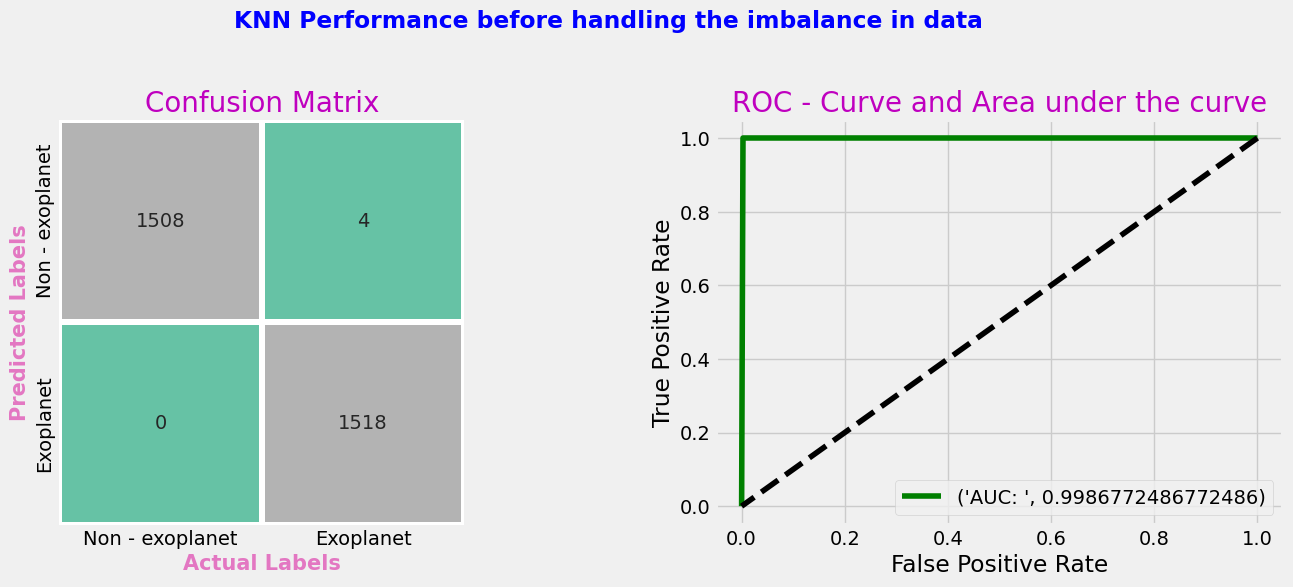

In [27]:
# Fit the KNN classifier model on the scaled train data
from sklearn.neighbors import KNeighborsClassifier as KNC

# Choosing k = 5
knn_classifier = KNC(n_neighbors = 1, metric = 'minkowski', p = 2)

# Fitting the model
knn_classifier.fit(x_train_sc, y_train)

# Predict the labels for the scaled test set
y_pred = knn_classifier.predict(x_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print("Validation accuracy of KNN: ", accuracy_score(y_test, y_pred))
print()
print("Classification report: \n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "Set2", fmt = "d", linewidths = 3, cbar = False, xticklabels = ['Non - exoplanet', 'Exoplanet'], yticklabels = ['Non - exoplanet', 'Exoplanet'], square = True)
plt.xlabel("Actual Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicted Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("Confusion Matrix", fontsize = 20, color = 'm')

# ROC Curve and Area under the curve
predicting_probabilities = knn_classifier.predict_proba(x_test_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC: ", auc(fpr, tpr)), color = 'g')
plt.plot([1,0], [1,0], "k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Curve and Area under the curve", fontsize = 20, color = 'm')
plt.show()

## Testing the model on the test set (unseen data) ##

In [28]:
# Read test dataset (CSV file) into a dataframe

test_df = pd.read_csv("/kaggle/input/kepler-labelled-time-series-data/exoTest.csv")
test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [29]:
test_df.shape

(570, 3198)

## Pre - processing the test dataset ##

In [30]:
# Check for missing values

test_df[test_df.isnull().any(axis = 1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


[Text(0, 0, '565'), Text(0, 0, '5')]

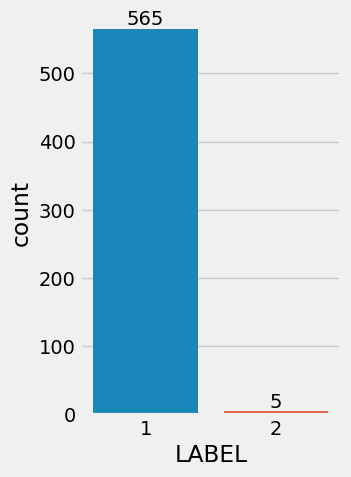

In [31]:
# Visualize distribution of labels using countplot

plt.figure(figsize = (3, 5))
ax = sns.countplot(x = 'LABEL', data = test_df)
ax.bar_label(ax.containers[0])

In [32]:
# Replacing the labels 2 and 1 with 1 and 0 respectively
test_df = test_df.replace({"LABEL": {2 : 1, 1 : 0}})
test_df.LABEL.unique()

array([1, 0])

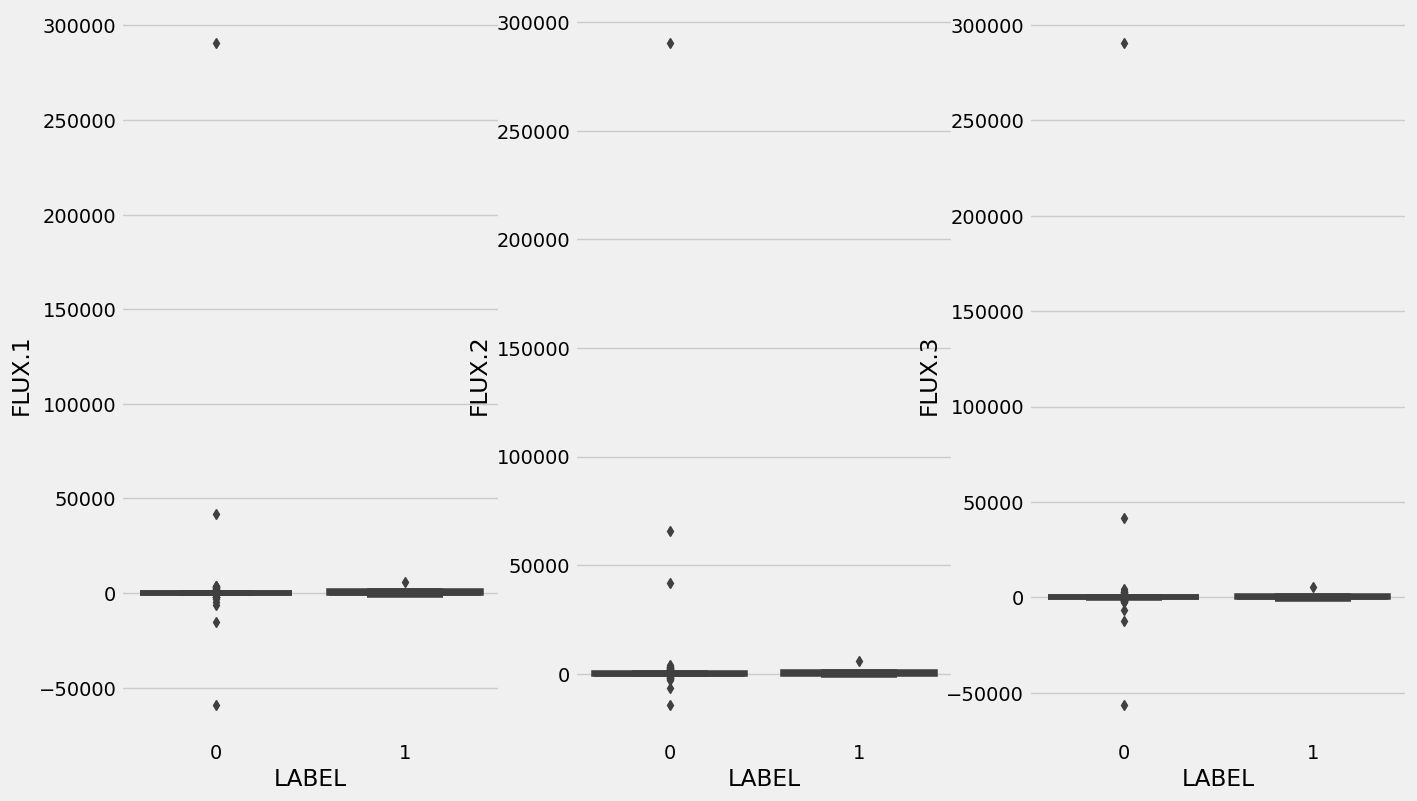

In [33]:
# Handle outliers

plt.figure(figsize = (20, 9))
for i in range(1, 4):
    plt.subplot(1, 4, i)
    sns.boxplot(data = test_df, x = 'LABEL', y = 'FLUX.' + str(i))

<Axes: xlabel='LABEL', ylabel='FLUX.781'>

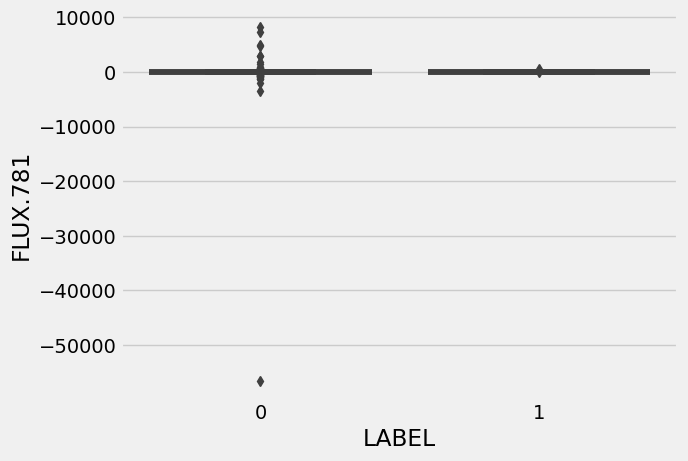

In [34]:
test_df.drop(test_df[test_df['FLUX.2'] > 0.25e6].index, axis = 0, inplace = True)
sns.boxplot(data = test_df, x = 'LABEL', y = 'FLUX.' + str(np.random.randint(1000)))

In [35]:
# Extract features and labels

x_unseen = test_df.drop(['LABEL'], axis = 1)
y_unseen = test_df.LABEL
x_unseen, y_unseen

(      FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6   FLUX.7   FLUX.8  \
 0     119.88   100.21    86.46    48.68    46.12    39.39    18.57     6.98   
 1    5736.59  5699.98  5717.16  5692.73  5663.83  5631.16  5626.39  5569.47   
 2     844.48   817.49   770.07   675.01   605.52   499.45   440.77   362.95   
 3    -826.00  -827.31  -846.12  -836.03  -745.50  -784.69  -791.22  -746.50   
 4     -39.57   -15.88    -9.16    -6.37   -16.13   -24.05    -0.90   -45.20   
 ..       ...      ...      ...      ...      ...      ...      ...      ...   
 565   374.46   326.06   319.87   338.23   251.54   209.84   186.35   167.46   
 566    -0.36     4.96     6.25     4.20     8.26    -9.53   -10.10    -4.54   
 567   -54.01   -44.13   -41.23   -42.82   -39.47   -24.88   -31.14   -24.71   
 568    91.36    85.60    48.81    48.69    70.05    22.30    11.63    37.86   
 569  3071.19  2782.53  2608.69  2325.47  2089.37  1769.56  1421.09  1142.09   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [36]:
# Feature scaling

x_unseen_sc = sc.fit_transform(x_unseen)

Validation accuracy of KNN:  0.9859402460456942

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       564
           1       0.00      0.00      0.00         5

    accuracy                           0.99       569
   macro avg       0.50      0.50      0.50       569
weighted avg       0.98      0.99      0.98       569



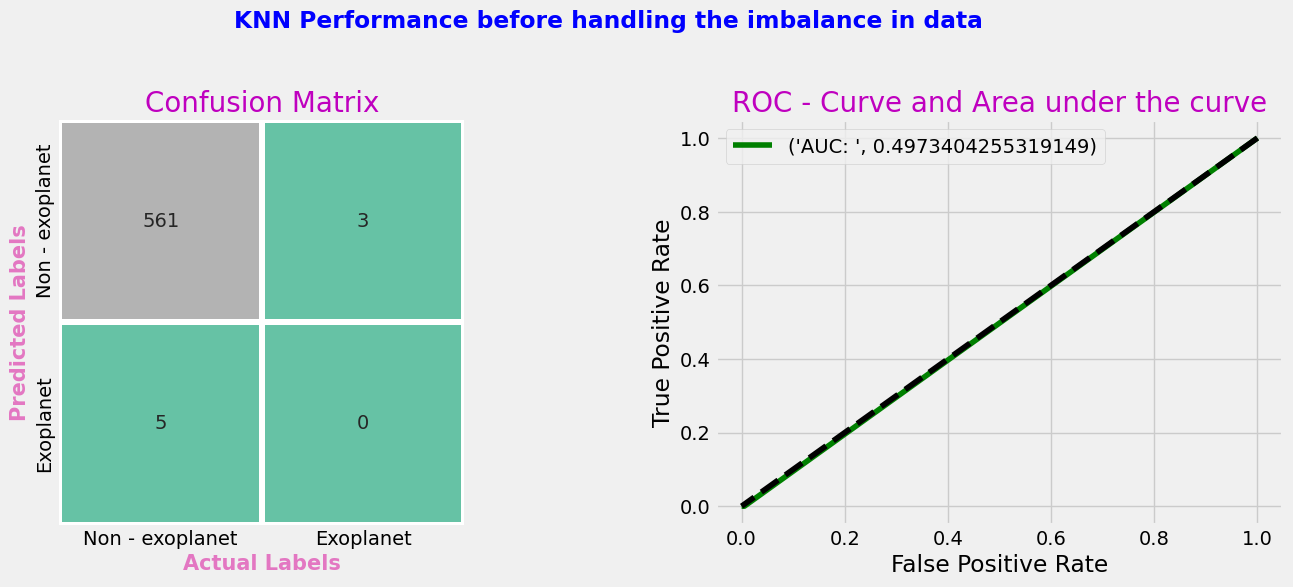

In [37]:
# Predict the labels for the scaled test set
y_pred = knn_classifier.predict(x_unseen_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print("Validation accuracy of KNN: ", accuracy_score(y_unseen, y_pred))
print()
print("Classification report: \n", classification_report(y_unseen, y_pred))

# Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_unseen, y_pred), annot = True, cmap = "Set2", fmt = "d", linewidths = 3, cbar = False, xticklabels = ['Non - exoplanet', 'Exoplanet'], yticklabels = ['Non - exoplanet', 'Exoplanet'], square = True)
plt.xlabel("Actual Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicted Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("Confusion Matrix", fontsize = 20, color = 'm')

# ROC Curve and Area under the curve
predicting_probabilities = knn_classifier.predict_proba(x_unseen_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_unseen, predicting_probabilities)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC: ", auc(fpr, tpr)), color = 'g')
plt.plot([1,0], [1,0], "k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Curve and Area under the curve", fontsize = 20, color = 'm')
plt.show()

As we can observe, due to the test dataset being higly imbalanced as well, the model did not make any predictions for exoplanet, i.e., the true positives are zero.